# Name : Yucan Luo  USC-ID 8085970332

# (a) download the data 

In [5]:

import os
import pandas as pd
import numpy as np
import glob
import re


In [6]:
## load all csv files 
all_files = glob.glob('../Homework 3 Data/AreM/*/*.csv')


In [7]:
print(all_files[:5])

['../Homework 3 Data/AreM/bending1/dataset7.csv', '../Homework 3 Data/AreM/bending1/dataset6.csv', '../Homework 3 Data/AreM/bending1/dataset4.csv', '../Homework 3 Data/AreM/bending1/dataset5.csv', '../Homework 3 Data/AreM/bending1/dataset1.csv']


In [8]:

# Sort the files based on two value (activitiles, dataset_number)
def sorting(s):
    activity, instance = s.split('/')[-2:]
    d_num = int(instance[7:-4])
    return (activity, d_num)


In [9]:
all_files = sorted(all_files, key = sorting)

In [10]:
#print(all_files)

In [11]:
## read each file into a dictory 
## with activity as a key and all datasets as value 
from collections import defaultdict 

all_data = defaultdict(list)

for file in all_files:
    activity = file.split("/")[-2]
    columns = ["time","avg_rss12", "var_rss12", "avg_rss13", "var_rss13","vg_rss23", "ar_rss23"]
    if file == '../Homework 3 Data/AreM/bending2/dataset4.csv': ## this is special csv format 
        data = pd.DataFrame(np.loadtxt(file))
        data.columns = columns
        
    else:
        data = pd.read_csv(file, skiprows = 5, names = columns)
    
    all_data[activity].append(data)
        



### (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data. 

In [12]:
## get train_data, test_data 

test_data = defaultdict(list)
train_data = defaultdict(list)

for folder, file in all_data.items():
    if folder == "bending1" or folder == "bending2":
        test_number = 2
    else:
        test_number = 3
    
    test_data[folder] = file[:test_number]
    
    train_data[folder] = file[test_number:]
    
        

In [13]:
for folder, file in all_data.items():
    print(folder)

bending1
bending2
cycling
lying
sitting
standing
walking


## (c) Feature Extraction

i. Research what types of time-domain feature

## basic features 

1.Means in each of the 𝑑 dimensions

2.Standard deviations of the 𝑑 dimensions

3.Skewness, Kurtosis and Higher order moments of the 𝑑 dimensions

4.Maximum and Minimum values

## time series related features 
1.The 𝑑×𝑑−1 Cross-Correlations between each dimension and the 𝑑 Auto-Correlations




## ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance.

In [14]:
def create_col(features):

    colnames = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 
             'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,features+1)]
    flat_colnames = [item for sublist in colnames for item in sublist]
    
    return flat_colnames
    
    


In [12]:

def extractFeature(data):
    features = 6
    flat_colnames = create_col(features)
    ## create a empty df to 
    df = pd.DataFrame(columns = flat_colnames)
    for folder, file in data.items():
    
        for instance in file:
        
        ## get rid of first column--- time 
            temp_df = instance.iloc[:,1:] 
            info = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
            ### reshape the data frame into sing row 
            df_summary = pd.DataFrame(info.to_numpy().reshape(1,-1),columns = flat_colnames) 
            df=df.append(df_summary) ### append df_summary to full_df


    return df 
        

In [16]:

#read all data and get summary values
table=extractFeature(all_data)
df_table = table.copy()

## add instance col to table to show 
idx = 0
new_col = [i+1 for i in range(88)]    
df_table.insert(loc=idx, column='instance', value=new_col) 
       

In [17]:
df_table

,instance,min1,max1,mean1,median1,std1,1stQ1,3rdQ1,min2,max2,...,std5,1stQ5,3rdQ5,min6,max6,mean6,median6,std6,1stQ6,3rdQ6
0,1,37.25,45.00,40.624792,40.50,1.476967,39.25,42.0000,0.0,1.30,...,2.188449,33.0000,36.00,0.00,1.92,0.570583,0.43,0.582915,0.0000,1.3000
0,2,38.00,45.67,42.812812,42.50,1.435550,42.00,43.6700,0.0,1.22,...,1.995255,32.0000,34.50,0.00,3.11,0.571083,0.43,0.601010,0.0000,1.3000
0,3,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,...,1.999604,35.3625,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400
0,4,33.00,47.75,42.179812,43.50,3.670666,39.15,45.0000,0.0,3.00,...,3.849448,30.4575,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000
0,5,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,...,2.411026,28.4575,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,84,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,...,3.283983,13.7300,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225
0,85,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,...,3.119856,13.5000,17.75,0.00,9.67,3.432563,3.20,1.732727,2.1575,4.5650
0,86,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,...,2.823124,14.0000,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350
0,87,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,...,3.131076,13.7500,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000


iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [18]:
### estimate the std for each column 
estimate_std = round(table.std(),3)

In [19]:
print(estimate_std)

min1       9.570
max1       4.394
mean1      5.336
median1    5.440
std1       1.772
1stQ1      6.154
3rdQ1      5.139
min2       0.000
max2       5.063
mean2      1.574
median2    1.412
std2       0.884
1stQ2      0.946
3rdQ2      2.125
min3       2.956
max3       4.875
mean3      4.008
median3    4.036
std3       0.947
1stQ3      4.221
3rdQ3      4.172
min4       0.000
max4       2.184
mean4      1.166
median4    1.146
std4       0.458
1stQ4      0.844
3rdQ4      1.553
min5       6.124
max5       5.741
mean5      5.676
median5    5.814
std5       1.025
1stQ5      6.096
3rdQ5      5.532
min6       0.046
max6       2.519
mean6      1.155
median6    1.086
std6       0.518
1stQ6      0.759
3rdQ6      1.524
dtype: float64


In [20]:
### Bootstrap (data is the dataframe that we need to resample, repeat is how many time we need resample \
###  CI is % confidence Interval )
def generate_bs(data,size,CI,func):
    
    ### we resample dataframe with original size, replacemetn is true, we extrct func for dataframe
    result = (data.sample(frac=1, replace=True).describe().loc[func].values for _ in range(size))
    
    
    # Construct the  bootstrap confidence interval
    lower_ = int(size * ((1- CI)/2))
    
    upper_ =  int(size - lower_)
     
    bootstrap_fun_CI = [(round(sorted(array)[lower_-1], 3), round(sorted(array)[upper_-1], 3))\
                    for array in zip(*result)] ## we need to unzip 
    
    return bootstrap_fun_CI


In [21]:
### create a bootstrap resample 100 time for each features 
### CI is 90% 
### we construct CI for std

table_std = generate_bs(table,100,0.9,"std")

In [22]:
print(table_std)

[(8.12, 10.74), (3.4, 5.331), (4.584, 5.83), (4.649, 5.937), (1.537, 1.964), (5.395, 6.587), (4.149, 5.799), (0.0, 0.0), (4.552, 5.443), (1.349, 1.698), (1.194, 1.544), (0.784, 0.944), (0.781, 1.025), (1.832, 2.286), (2.638, 3.147), (4.138, 5.441), (3.548, 4.562), (3.541, 4.617), (0.739, 1.124), (3.779, 4.738), (3.653, 4.761), (0.0, 0.0), (1.952, 2.375), (1.047, 1.22), (1.032, 1.201), (0.414, 0.491), (0.762, 0.884), (1.398, 1.626), (4.422, 7.776), (5.041, 6.656), (4.521, 6.889), (4.615, 7.087), (0.798, 1.235), (4.916, 7.335), (4.478, 6.662), (0.0, 0.064), (2.257, 2.749), (1.038, 1.223), (0.966, 1.152), (0.462, 0.546), (0.686, 0.814), (1.37, 1.619)]


In [23]:
### construct dataframe for std 
std_CI = pd.DataFrame({
    "STD": estimate_std,
    "90% Confidence Interval": table_std})

In [24]:
std_CI

,STD,90% Confidence Interval
min1,9.570,"(8.12, 10.74)"
max1,4.394,"(3.4, 5.331)"
mean1,5.336,"(4.584, 5.83)"
median1,5.440,"(4.649, 5.937)"
std1,1.772,"(1.537, 1.964)"
1stQ1,6.154,"(5.395, 6.587)"
3rdQ1,5.139,"(4.149, 5.799)"
min2,0.000,"(0.0, 0.0)"
max2,5.063,"(4.552, 5.443)"
mean2,1.574,"(1.349, 1.698)"


iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

I choose max, mean and std as three important features

# (d) Binary Classification Using Logistic Regression

(i) Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classication problem. Depict scatter plots of the features you specied in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).

In [13]:
### since we need to apply classification we need to revise the extract fearture function by adding how many 
### piece we need to divide and add activity as output value 
### data is the data we need to extract features , divide is how many piece we need to divide the dataset  

def revised_extractFeature(data, divide):
    import math
    sample_size=math.ceil(480/divide)
    
    features = divide * 6 
    flat_colnames = create_col(features)
    
    ## create a empty df  
    df = pd.DataFrame(columns = flat_colnames)

    for folder, file in data.items():

        for instance in file:
            piece_col = ['min', 'max', 'mean', '50%', 'std', '25%', '75%']
        
            ## create a empty df to store each sliced df and concatenate them
            sliced_df = pd.DataFrame(columns = piece_col)
            ## get rid of time column 
            temp_instance_df = instance.iloc[:,1:]
            start_index = 0
            for i in range(divide):
                if i == divide -1: ## last piece
                    temp_df = temp_instance_df.iloc[start_index:,] 
                else:
                    temp_df = temp_instance_df.iloc[start_index:start_index+sample_size,]
                
                info = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
         
                start_index += sample_size
         
                sliced_df = sliced_df.append(info) ### append piece of dataframe into a empty df 
            
            ### reshape the dataframe into single row 
            df_summary = pd.DataFrame(sliced_df.to_numpy().reshape(1,-1),columns = flat_colnames)
            ### classify the acitivity 
            ### if activity = bending then it classify as 1 otherwise it's 0 
            if folder == "bending1" or folder == "bending2":
                df_summary["activity"] = 1
            else:
                df_summary["activity"] = 0
                
            df = df.append(df_summary)

    return df 
        


In [21]:
#### get the train_table from train data 

train_table = revised_extractFeature(train_data,1)

In [22]:
train_table.head(5)

,min1,max1,mean1,median1,std1,1stQ1,3rdQ1,min2,max2,mean2,...,1stQ5,3rdQ5,min6,max6,mean6,median6,std6,1stQ6,3rdQ6,activity
0,35.00,47.40,43.954500,44.33,1.558835,43.00,45.00,0.0,1.70,0.426250,...,35.3625,36.50,0.0,1.79,0.493292,0.43,0.513506,0.00,0.94,1.0
0,33.00,47.75,42.179812,43.50,3.670666,39.15,45.00,0.0,3.00,0.696042,...,30.4575,36.33,0.0,2.18,0.613521,0.50,0.524317,0.00,1.00,1.0
0,33.00,45.75,41.678063,41.75,2.243490,41.33,42.75,0.0,2.83,0.535979,...,28.4575,31.25,0.0,1.79,0.383292,0.43,0.389164,0.00,0.50,1.0
0,37.00,48.00,43.454958,43.25,1.386098,42.50,45.00,0.0,1.58,0.378083,...,22.2500,24.00,0.0,5.26,0.679646,0.50,0.622534,0.43,0.87,1.0
0,36.25,48.00,43.969125,44.50,1.618364,43.31,44.67,0.0,1.50,0.413125,...,20.5000,23.75,0.0,2.96,0.555312,0.49,0.487826,0.00,0.83,1.0


In [23]:
### select 1 ,2 6 features and output 
train_select = train_table.loc[:, train_table.columns.str.endswith(('1', '2', '6', 'activity'))]

In [24]:
### select max , mean and std those three features ----we select as important features and output 
train_select = train_select.loc[:,train_select.columns.str.startswith(("mean","max","std","activity"))]

In [25]:
train_select.head(5)

,max1,mean1,std1,max2,mean2,std2,max6,mean6,std6,activity
0,47.40,43.954500,1.558835,1.70,0.426250,0.338690,1.79,0.493292,0.513506,1.0
0,47.75,42.179812,3.670666,3.00,0.696042,0.630860,2.18,0.613521,0.524317,1.0
0,45.75,41.678063,2.243490,2.83,0.535979,0.405469,1.79,0.383292,0.389164,1.0
0,48.00,43.454958,1.386098,1.58,0.378083,0.315566,5.26,0.679646,0.622534,1.0
0,48.00,43.969125,1.618364,1.50,0.413125,0.263111,2.96,0.555312,0.487826,1.0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


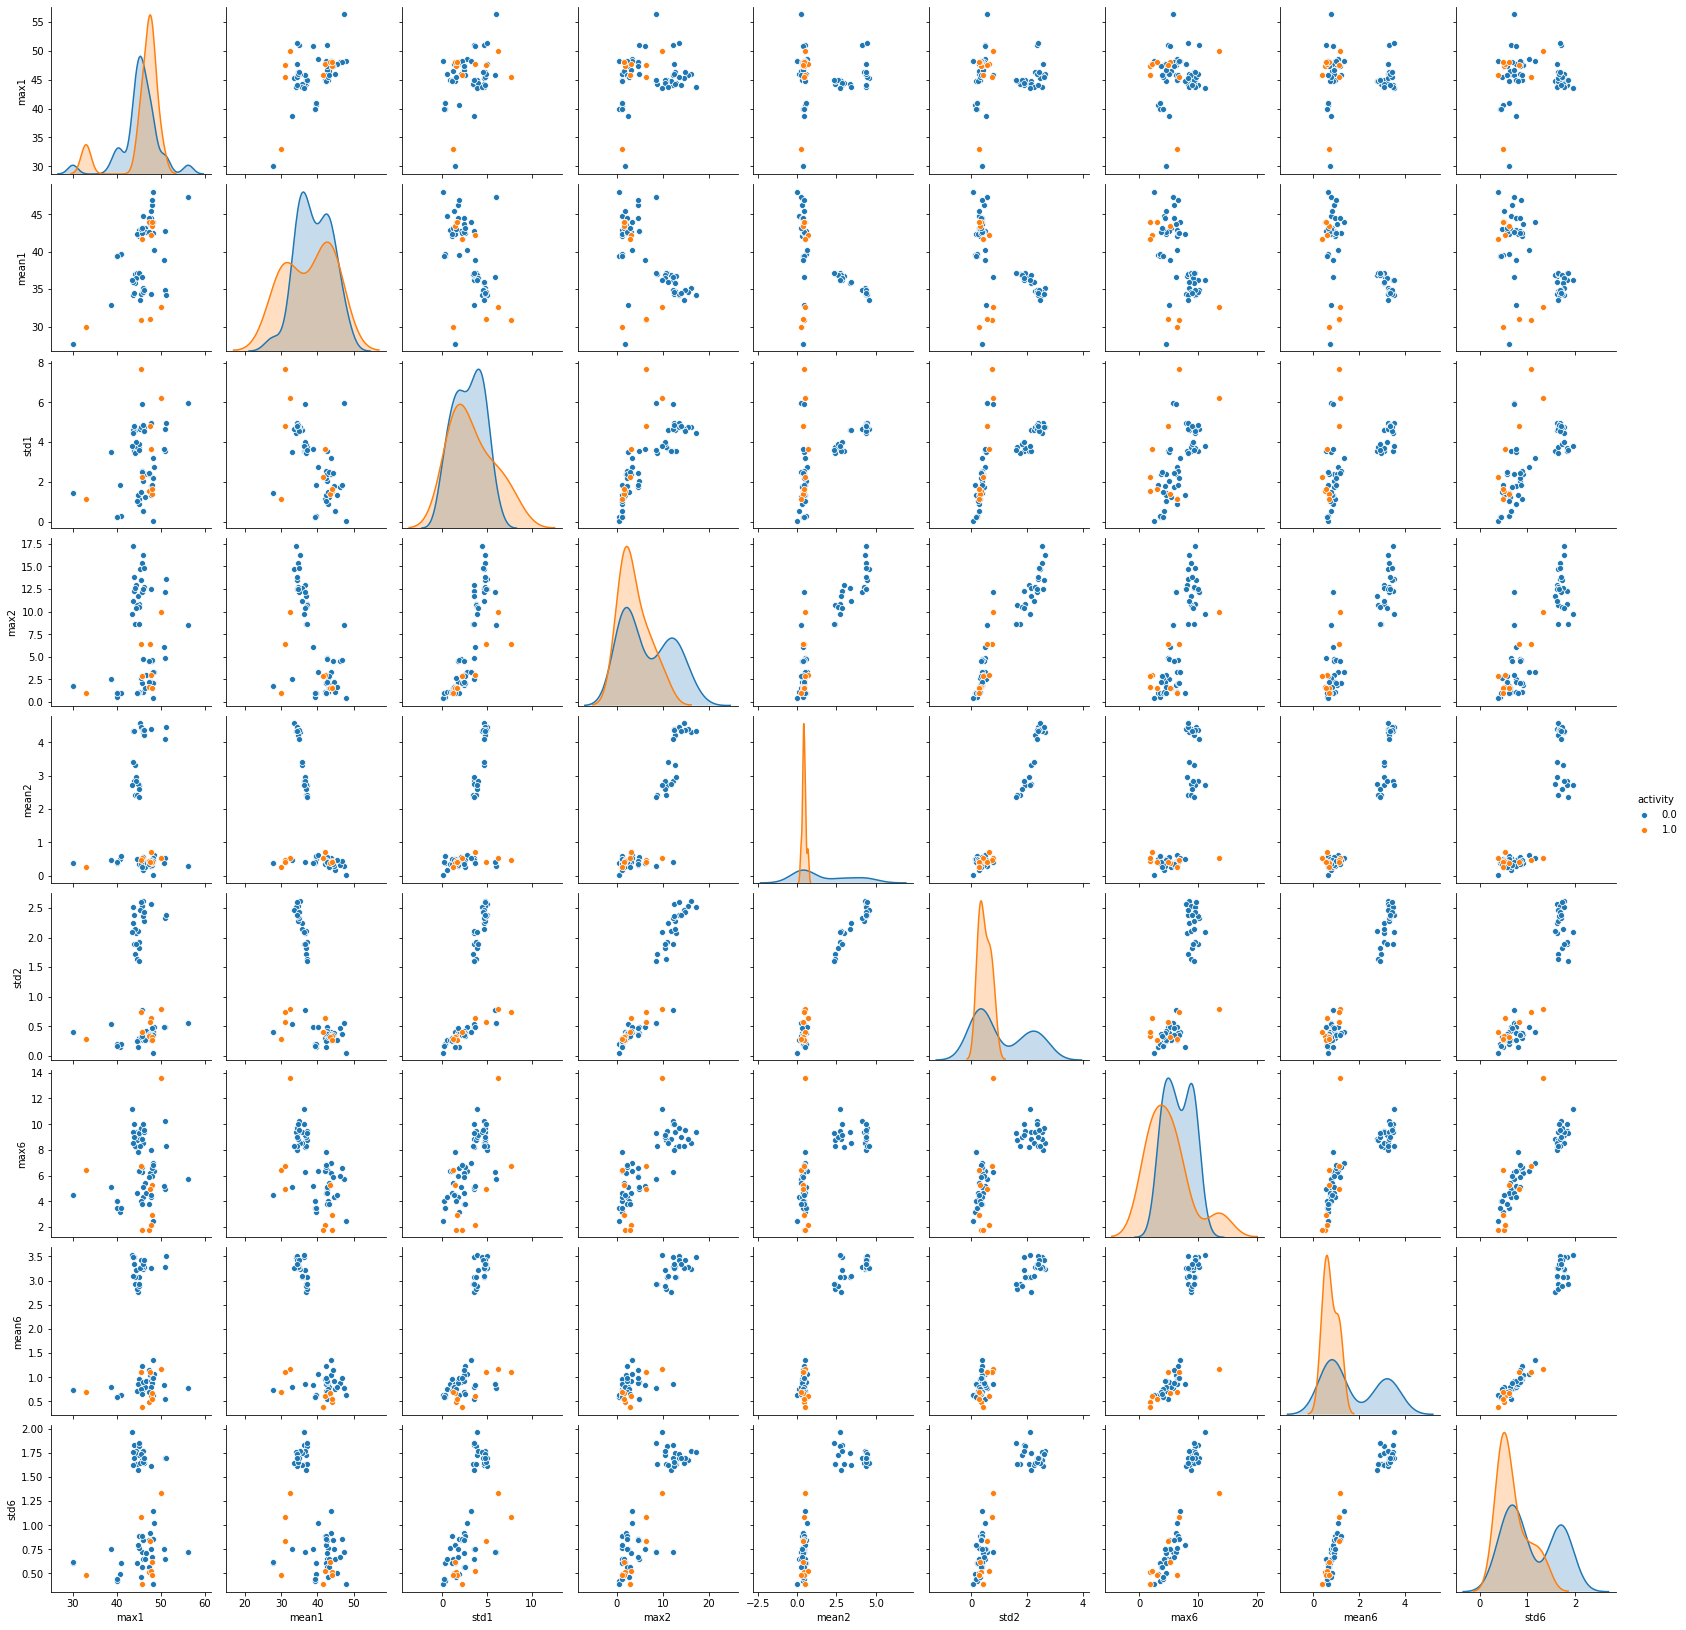

In [27]:
#put all features pair  in one scatterplot

sns.pairplot(train_select,hue="activity")
plt.show()

ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in ??, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 12. Do you see any considerable difference in the results with those of ???

# d) ii.break training set times series into two length time series 

In [28]:
## split the train data into 2 
train_data_split2 = revised_extractFeature(train_data,2)

In [29]:
train_data_split2

,min1,max1,mean1,median1,std1,1stQ1,3rdQ1,min2,max2,mean2,...,1stQ11,3rdQ11,min12,max12,mean12,median12,std12,1stQ12,3rdQ12,activity
0,36.50,46.50,44.057167,44.500,1.556971,43.2500,45.0000,0.0,1.50,0.381042,...,33.00,36.2500,0.00,1.50,0.388333,0.000,0.478528,0.0000,0.7100,1.0
0,33.75,47.75,43.278875,45.000,3.473355,42.0000,45.2500,0.0,3.00,0.673292,...,28.75,33.7500,0.00,2.18,0.586083,0.470,0.491873,0.0000,0.8700,1.0
0,33.00,45.75,41.621208,42.330,3.118644,39.6525,44.2500,0.0,2.83,0.623083,...,28.31,30.5625,0.00,1.50,0.347500,0.430,0.363144,0.0000,0.5000,1.0
0,39.00,48.00,44.117042,45.000,1.359836,43.5000,45.0000,0.0,1.30,0.250042,...,22.50,23.7500,0.00,4.06,0.543875,0.500,0.473445,0.4300,0.7100,1.0
0,36.67,45.00,43.486208,43.710,1.281976,42.3300,44.5000,0.0,1.30,0.378667,...,21.00,23.5000,0.00,2.96,0.585750,0.500,0.487918,0.4225,0.8300,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,19.50,45.00,33.334500,34.000,4.874433,29.9375,36.8125,0.0,11.78,4.408083,...,13.73,18.0625,0.43,8.32,3.290292,3.155,1.646023,2.0500,4.4525,0.0
0,20.33,44.50,34.036750,34.415,4.872880,30.7500,37.7500,0.0,13.47,4.778292,...,13.50,17.7500,0.00,9.67,3.321417,3.155,1.758379,2.0500,4.3950,0.0
0,19.50,43.33,34.033875,35.000,4.758757,30.9375,37.5000,0.0,12.47,4.574625,...,13.67,17.2500,0.00,8.64,3.432208,3.255,1.691050,2.1600,4.5125,0.0
0,24.33,44.00,34.920792,35.330,4.272282,32.2500,37.8125,0.0,14.82,4.177958,...,14.00,18.0625,0.00,9.51,3.418667,3.350,1.598536,2.1700,4.4525,0.0


In [30]:
### repeat experiment did in (d)i
### select 1 ,2 12 (mean, max, std) features and output 
train_select_2 = train_data_split2.loc[:, ['max1','median1','std1','max2','median2','std2','max12',\
                                           'median12','std12','activity']]


In [31]:
train_select_2

,max1,median1,std1,max2,median2,std2,max12,median12,std12,activity
0,46.50,44.500,1.556971,1.50,0.470,0.329540,1.50,0.000,0.478528,1.0
0,47.75,45.000,3.473355,3.00,0.485,0.634285,2.18,0.470,0.491873,1.0
0,45.75,42.330,3.118644,2.83,0.500,0.489595,1.50,0.430,0.363144,1.0
0,48.00,45.000,1.359836,1.30,0.000,0.314099,4.06,0.500,0.473445,1.0
0,45.00,43.710,1.281976,1.30,0.470,0.284434,2.96,0.500,0.487918,1.0
...,...,...,...,...,...,...,...,...,...,...
0,45.00,34.000,4.874433,11.78,4.195,2.196206,8.32,3.155,1.646023,0.0
0,44.50,34.415,4.872880,13.47,4.030,2.762730,9.67,3.155,1.758379,0.0
0,43.33,35.000,4.758757,12.47,4.470,2.391804,8.64,3.255,1.691050,0.0
0,44.00,35.330,4.272282,14.82,3.865,2.341763,9.51,3.350,1.598536,0.0


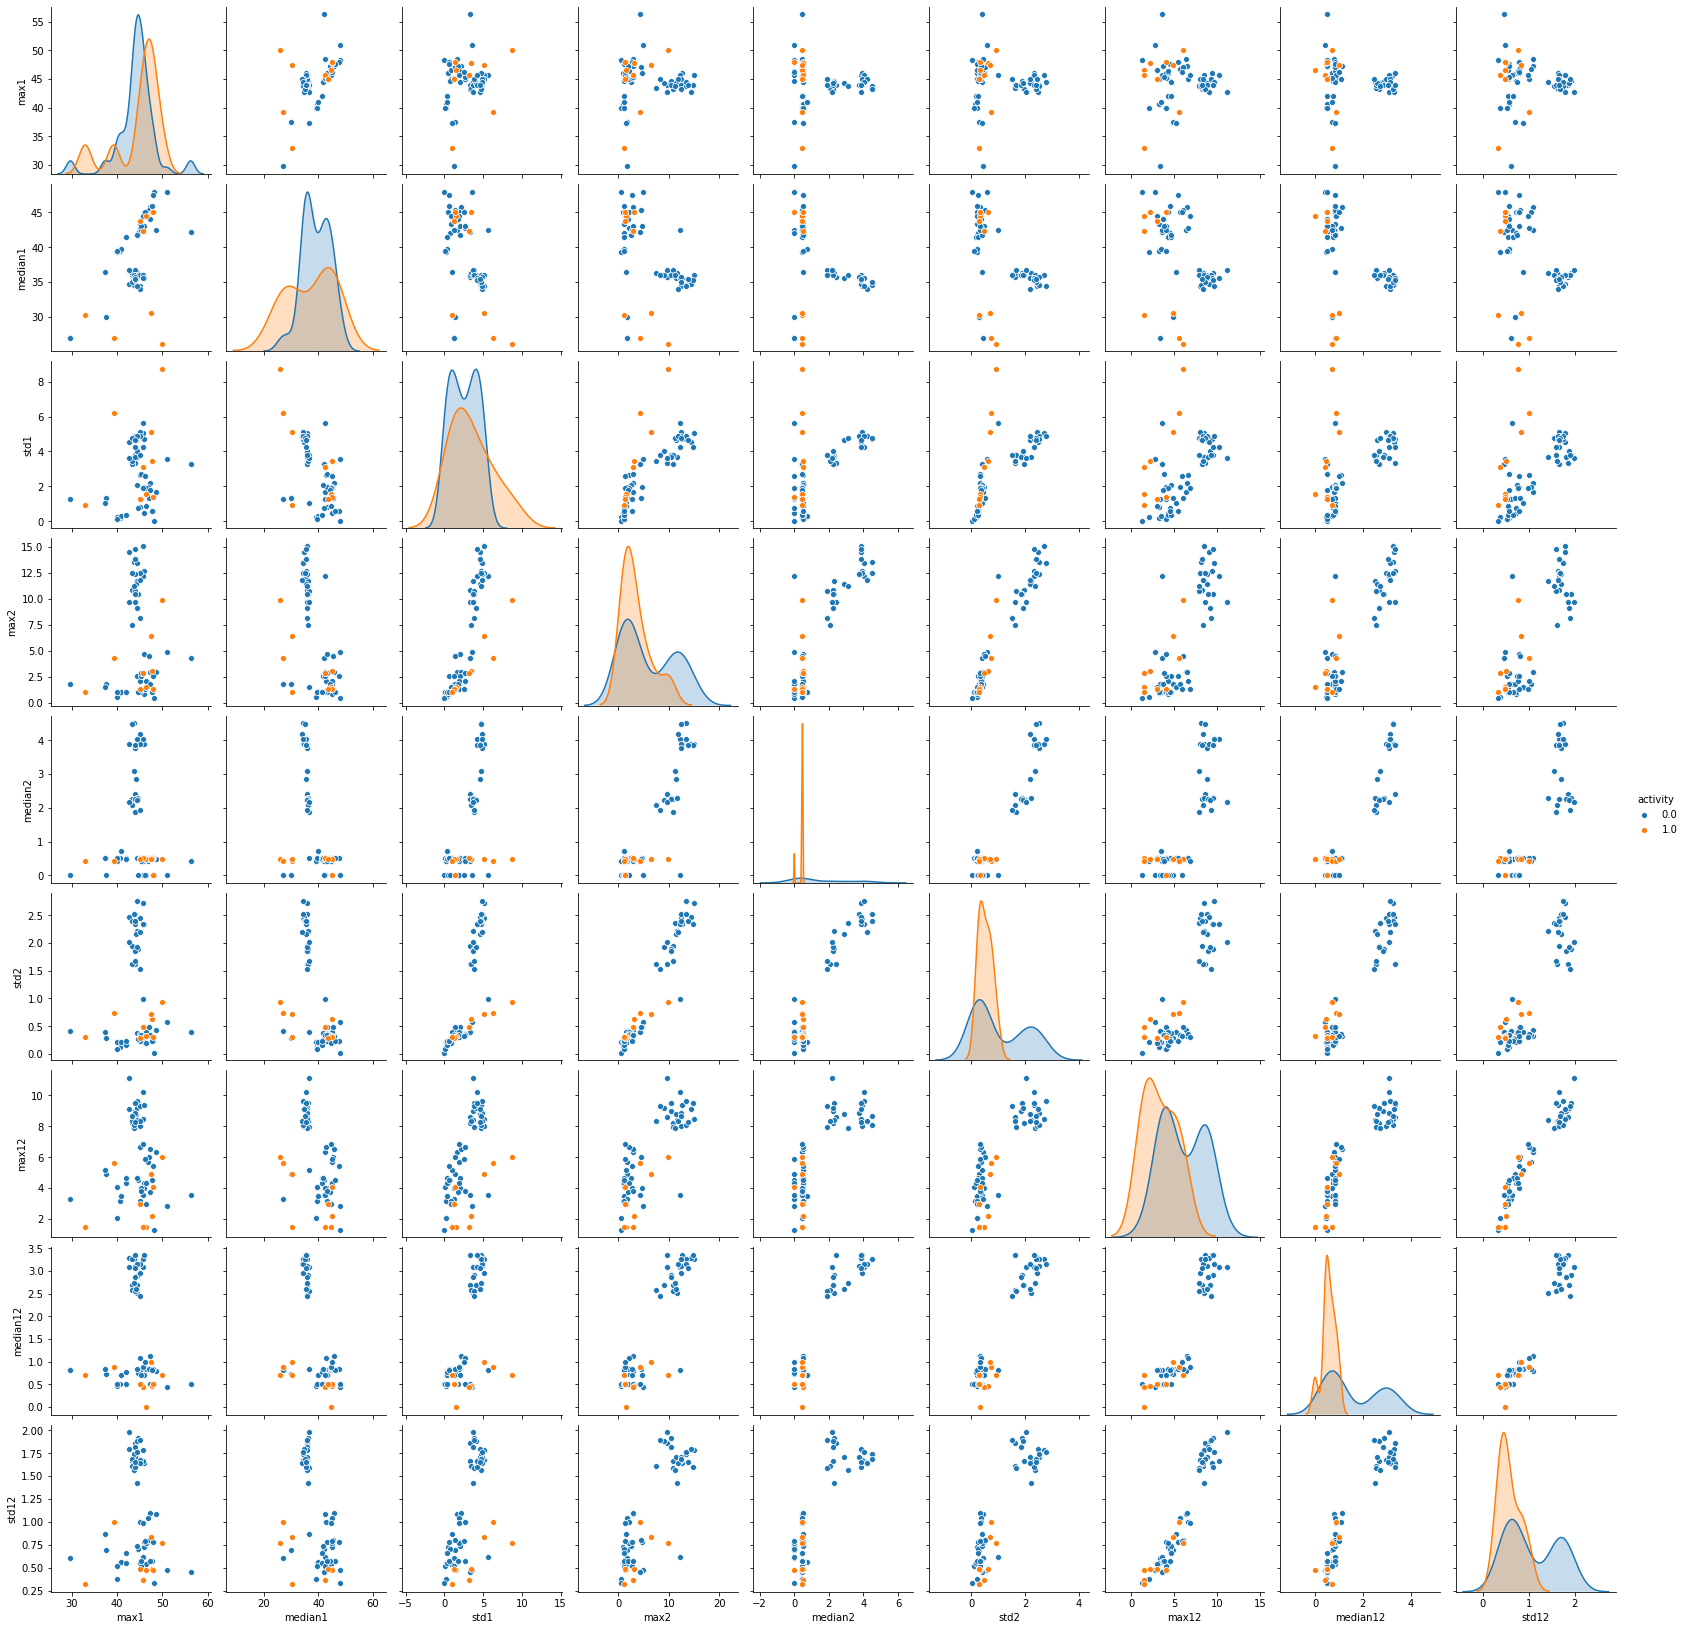

In [32]:
#put all features pair  in one scatterplot

sns.pairplot(train_select_2,hue="activity")
plt.show()

## d) iii Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series and use logistic regression for binary classification 

In [17]:

from sklearn.linear_model import LogisticRegression
#import statsmodels.api as sm
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE ,RFECV,chi2
from sklearn.metrics import roc_auc_score


# cross validation 
right way : feature selection should be included in Cross Validation, which means that we would reselect features each time.


wrong way: Do feature selection before apply cross validation

In [16]:
# to select each mean,std, and max value
def getFeature(data):
    three_features = ("mean","max","std")
    choosen_data= data.loc[:,data.columns.str.startswith(three_features)]
    return choosen_data

In [38]:
# Recursive Feature Elimination 
from collections import defaultdict
result_dict = defaultdict(dict)

for l in range(1,21):
    train_sliced = revised_extractFeature(train_data,l) ### break train data into l piece 
    X_train = getFeature(train_sliced)  ### three features that we choose previously 
    y_train = train_sliced.iloc[:,-1]  ### target value 
    logreg = LogisticRegression(solver='lbfgs', max_iter=400)
    rfecv = RFECV(logreg, cv=5, n_jobs = -1)
    selector = rfecv.fit(X_train, y_train)
    f1 = f1_score(y_train, selector.predict(X_train))
    num_p =sum(selector.support_)
    best_grid_score = max(selector.grid_scores_)
    
    result_dict[l] = [num_p,best_grid_score,f1]


In [39]:
for l, p in result_dict.items():
    print("the (l, p) is ({} {}) and best_grid_scores is {}, F1 score is {}".format(l, p[0],p[1],p[2]))

the (l, p) is (1 10) and best_grid_scores is 0.9857142857142858, F1 score is 1.0
the (l, p) is (2 4) and best_grid_scores is 0.9571428571428573, F1 score is 1.0
the (l, p) is (3 1) and best_grid_scores is 0.9714285714285715, F1 score is 0.8750000000000001
the (l, p) is (4 1) and best_grid_scores is 0.9714285714285715, F1 score is 0.823529411764706
the (l, p) is (5 1) and best_grid_scores is 0.9571428571428573, F1 score is 0.8750000000000001
the (l, p) is (6 8) and best_grid_scores is 0.9714285714285715, F1 score is 1.0
the (l, p) is (7 4) and best_grid_scores is 0.9714285714285715, F1 score is 1.0
the (l, p) is (8 9) and best_grid_scores is 0.9571428571428573, F1 score is 1.0
the (l, p) is (9 1) and best_grid_scores is 0.9714285714285715, F1 score is 0.8
the (l, p) is (10 1) and best_grid_scores is 0.9714285714285715, F1 score is 0.8750000000000001
the (l, p) is (11 9) and best_grid_scores is 0.9714285714285715, F1 score is 1.0
the (l, p) is (12 16) and best_grid_scores is 0.9714285714


After running 5-fold CV, for each l, the (1, 10) has highest score 
so, I decide to choose (1, 10)


# d) iv. Report the confusion matrix and show the ROC and AUC and the parameters of your logistic regression

In [40]:


## choose (1, 10) pair as best classifiy to get 10 choosen features 
## so there is no divide 
train_sliced = revised_extractFeature(train_data,1) ### without break  
X_train = getFeature(train_sliced)  ### three features that we choose previously 
y_train = train_sliced.iloc[:,-1]  ### target value 

model = LogisticRegression(solver='lbfgs', max_iter=400)

rfecv = RFECV(model, cv=5, n_jobs = -1)
selector = rfecv.fit(X_train, y_train)

## the 10 features that we pruned after feature selection
pruned_data_col = X_train.iloc[:, selector.support_].columns




In [41]:
pruned_data_col  ### the 10 features that we choose 

Index(['mean1', 'max2', 'max3', 'mean3', 'mean4', 'max5', 'mean5', 'std5',
       'max6', 'mean6'],
      dtype='object')

In [42]:
choosen_data = X_train[pruned_data_col]

In [43]:
choosen_data.head(5)

,mean1,max2,max3,mean3,mean4,max5,mean5,std5,max6,mean6
0,43.954500,1.70,29.75,22.122354,0.497312,38.50,35.588458,1.999604,1.79,0.493292
0,42.179812,3.00,30.00,22.183625,0.989917,38.67,33.493917,3.849448,2.18,0.613521
0,41.678063,2.83,28.25,19.006563,0.841875,37.50,29.857083,2.411026,1.79,0.383292
0,43.454958,1.58,27.00,15.793333,0.849354,33.50,23.034792,2.488862,5.26,0.679646
0,43.969125,1.50,26.33,15.868021,0.666354,30.75,22.103750,3.318301,2.96,0.555312


In [47]:
## report confusion matrix and show ROC and AUC for train dataset 

## fit the  logistic regression model with choosen_data 

model = LogisticRegression(solver='lbfgs', max_iter=400)

selector = model.fit(choosen_data, y_train)

score_train = selector.score(choosen_data,y_train)

#.predict_proba* estimates probabilities for negative and positive
pred_y_prob = selector.predict_proba(choosen_data)[:,1]
pred_y = selector.predict(choosen_data)

tn, fp, fn, tp = confusion_matrix(y_train,pred_y).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')


## confusion metrix table for train data 
confusion_metrix_table = pd.DataFrame(confusion_matrix(y_train, pred_y), columns=['prdicted false', "Predicted true"], index=['Actual false', 'Actual true'])
print(confusion_metrix_table)



True Positives: 9
False Positives: 0
True Negatives: 60
False Negatives: 0
              prdicted false  Predicted true
Actual false              60               0
Actual true                0               9


from the confusion metrix table, there are 60 True negative and 9 True positive and zero type error.

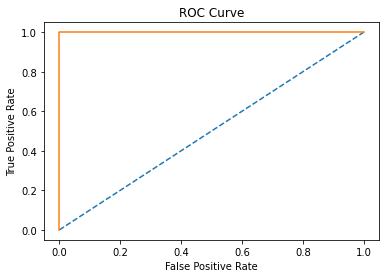

AUC score is: 1.0


In [48]:
# ROC AND AUC 
from sklearn.metrics import roc_auc_score
#calculate fpr,tpr  from ROC_curve 
fpr, tpr, thresholds = roc_curve(y_train, pred_y)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#calculate AUC score
auc_score = roc_auc_score(y_train, pred_y_prob)
print("AUC score is:", auc_score)

In [49]:

## calculate p value and get coefficient 

model = LogisticRegression(solver='lbfgs', max_iter=400).fit(choosen_data, y_train) 
coef = model.coef_ 


col_name = [i for i in pruned_data_col]

coefficient = []
for i in coef:
    #print(i)
    for j in i:
        coefficient.append(j)

scores, pvalues = chi2(choosen_data, y_train)


coef_pvalues = zip(col_name, coefficient, pvalues)
for item in coef_pvalues:
    print('{} : coefficient is {} and it P values is : {}'.format(item[0],item[1],item[2]))
    



mean1 : coefficient is -0.3462307121062365 and it P values is : 0.5160232730422721
max2 : coefficient is -0.24098173600352374 and it P values is : 0.0012098102642043149
max3 : coefficient is -0.07912077928992055 and it P values is : 0.0022031526289674063
mean3 : coefficient is -0.42153172928901833 and it P values is : 0.06443738545487063
mean4 : coefficient is -0.06782880205317439 and it P values is : 0.05135780348948637
max5 : coefficient is 0.7196480202287205 and it P values is : 3.221813278707475e-12
mean5 : coefficient is 0.7608934644457856 and it P values is : 1.9408593595246503e-11
std5 : coefficient is -0.16951442758969193 and it P values is : 0.6246320795663878
max6 : coefficient is -0.0667347062161554 and it P values is : 0.0730040156042106
mean6 : coefficient is -0.09521695880266477 and it P values is : 0.025691692885283095


# v. Test the classiﬁer on the test set

In [51]:
### get the test table 
test_table = revised_extractFeature(test_data, 1) ### same break with train 
y_test = test_table.iloc[:,-1]  ## target value
X_test = test_table[pruned_data_col]  ### test table with choosen features from previous 

### test classify on test 
test_score = model.score(X_test, y_test)
print("Accuracy of the test data is: ", round(test_score,3))
print("Cross-validation accuracy of train data is: 0.985")

Accuracy of the test data is:  1.0
Cross-validation accuracy of train data is: 0.985


# vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters？


yes, from the pairwise plot, indeed, part of class is well-separeted, which might casue instanbility in calculating logistic regression parameters.



# vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

In [45]:

### confusion _metrix 
print(confusion_metrix_table)

              prdicted false  Predicted true
Actual false              60               0
Actual true                0               9


from the confusion metrix table, we can see that the data suffer from class imbalance here. so I decide to use case-control to revise the data (downsample the majority data)

In [1]:
### revise the data and repeat d iii again 

### downsampling the majority class, which is non bending class 

from sklearn.utils import resample
from sklearn.metrics import roc_auc_score

def down_sample(data):
    
    df =data 
    
    
    ### marjority of class = 0 non-bending
    df_majority = df[df.activity==0]
    
    ### minority class is activity == 1
    df_minority = df[df.activity==1] ## bending 
 
    # Downsample majority class
    df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority) ,random_state=1234) 
 
    # Combine minority class with downsampled majority class
    df_downsampled = pd.concat([df_majority_downsampled, df_minority])
    
    
    return df_downsampled
    
    

In [47]:
### revise the data and repeat d iii again 

### downsampling the majority class which is non bending class 

from collections import defaultdict
result_dict = defaultdict(dict)

for l in range(1,21):
    train_sliced = revised_extractFeature(train_data,l) ### break train data into l piece 
    
    ### revise the imblanced data using down_sample 
    # transform the dataset
    train_sliced = down_sample(train_sliced)
    X_train = getFeature(train_sliced)  ### three features that we choose previously 
    y_train = train_sliced.iloc[:,-1]  ### target value 
    

    ### then apply logistic regression 
    logreg = LogisticRegression(solver='lbfgs', max_iter=400)
    rfecv = RFECV(logreg, cv=5, n_jobs = -1)
    selector = rfecv.fit(X_train, y_train)
    f1 = f1_score(y_train, rfecv.predict(X_train))
    num_p =sum(selector.support_)
    best_grid_score = max(selector.grid_scores_)
    
    result_dict[l] = [num_p,best_grid_score,f1]


In [48]:
### for downsampled data check (l , p)

for l, p in result_dict.items():
    print("the (l, p) is ({} {}) and best_grid_scores is {}, F1 score is {}".format(l, p[0],p[1],p[2]))

the (l, p) is (1 5) and best_grid_scores is 0.9333333333333332, F1 score is 1.0
the (l, p) is (2 7) and best_grid_scores is 0.9333333333333332, F1 score is 1.0
the (l, p) is (3 1) and best_grid_scores is 0.9333333333333332, F1 score is 1.0
the (l, p) is (4 24) and best_grid_scores is 1.0, F1 score is 1.0
the (l, p) is (5 7) and best_grid_scores is 0.9333333333333332, F1 score is 1.0
the (l, p) is (6 35) and best_grid_scores is 1.0, F1 score is 1.0
the (l, p) is (7 33) and best_grid_scores is 1.0, F1 score is 1.0
the (l, p) is (8 26) and best_grid_scores is 1.0, F1 score is 1.0
the (l, p) is (9 49) and best_grid_scores is 1.0, F1 score is 1.0
the (l, p) is (10 39) and best_grid_scores is 1.0, F1 score is 1.0
the (l, p) is (11 7) and best_grid_scores is 1.0, F1 score is 1.0
the (l, p) is (12 10) and best_grid_scores is 1.0, F1 score is 1.0
the (l, p) is (13 41) and best_grid_scores is 1.0, F1 score is 1.0
the (l, p) is (14 44) and best_grid_scores is 1.0, F1 score is 1.0
the (l, p) is (1

for downsampled data, I found out that multiple best_grid_scores 
I would choose (11,7) as the best one since the number of features is less than 10





# report confusion metrix, ROC and AUC for after downsample data 

In [21]:
### we choose (11, 7) as best  

train_sliced = revised_extractFeature(train_data,11) ### with break  = 11

### revise the imblanced data using down_sample 
# transform the dataset
train_sliced = down_sample(train_sliced)
  
X_train = getFeature(train_sliced)  ### three features that we choose previously 
y_train = train_sliced.iloc[:,-1]  ### target value 

model= LogisticRegression(solver='lbfgs', max_iter=400)

rfecv = RFECV(model, cv=5, n_jobs = -1)
selector = rfecv.fit(X_train, y_train)

## the best features that we choose  
choosen_data_col = X_train.iloc[:, selector.support_].columns


choosen_data = X_train[choosen_data_col]

## report confusion matrix and show ROC and AUC

## fit the  logistic regression model with choosen_data 

model = LogisticRegression(solver='lbfgs', max_iter=400)
#selector = RFECV(model, step=1, cv=5, n_jobs=-1)
selector = selector.fit(choosen_data, y_train)

#.predict_proba* estimates probabilities for negative and positive
pred_y_prob = selector.predict_proba(choosen_data)[:,1]
pred_y = selector.predict(choosen_data)

tn, fp, fn, tp = confusion_matrix(y_train,pred_y).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')


## confusion metrix table 
confusion_metrix_table = pd.DataFrame(confusion_matrix(y_train, pred_y), columns=['prdicted false', "Predicted true"], index=['Actual false', 'Actual true'])
print(confusion_metrix_table)

True Positives: 9
False Positives: 0
True Negatives: 9
False Negatives: 0
              prdicted false  Predicted true
Actual false               9               0
Actual true                0               9


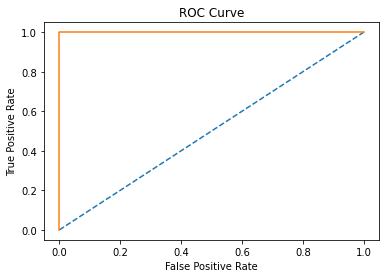

AUC score is: 1.0


In [25]:
# ROC AND AUC 
#from sklearn.metrics import roc_auc_score
#calculate fpr,tpr  from ROC_curve 
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, pred_y)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#calculate AUC score
auc_score = roc_auc_score(y_train, pred_y_prob)
print("AUC score is:", auc_score)

# instead of using down-sample, use smote()  for case control

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
result_dict = defaultdict(dict)

for l in range(1,21):
    train_sliced = revised_extractFeature(train_data,l) ### break train data into l piece 
    X_train = getFeature(train_sliced)  ### three features that we choose previously 
    y_train = train_sliced.iloc[:,-1]  ### target value
    
    ### revise the imblanced data using smote
    # transform the dataset to avoid imblance data 
    sm = SMOTE(random_state = 2)
    X_train, y_train = sm.fit_sample(X_train, y_train)
    

    ### then apply logistic regression 
    logreg = LogisticRegression(solver='lbfgs', max_iter=400)
    rfecv = RFECV(logreg, cv=5, n_jobs = -1)
    selector = rfecv.fit(X_train, y_train)
    f1 = f1_score(y_train, rfecv.predict(X_train))
    num_p =sum(selector.support_)
    best_grid_score = max(selector.grid_scores_)
    
    result_dict[l] = [num_p,best_grid_score,f1]


In [18]:
## after case control 

for l, p in result_dict.items():
    print("the (l, p) is ({} {}) and best_grid_scores is {}, F1 score is {}".format(l, p[0],p[1],p[2]))

the (l, p) is (1 8) and best_grid_scores is 0.9916666666666668, F1 score is 1.0
the (l, p) is (2 4) and best_grid_scores is 0.9916666666666668, F1 score is 1.0
the (l, p) is (3 3) and best_grid_scores is 0.9916666666666668, F1 score is 1.0
the (l, p) is (4 9) and best_grid_scores is 1.0, F1 score is 1.0
the (l, p) is (5 6) and best_grid_scores is 0.9916666666666668, F1 score is 1.0
the (l, p) is (6 10) and best_grid_scores is 1.0, F1 score is 1.0
the (l, p) is (7 7) and best_grid_scores is 1.0, F1 score is 1.0
the (l, p) is (8 12) and best_grid_scores is 1.0, F1 score is 1.0
the (l, p) is (9 11) and best_grid_scores is 1.0, F1 score is 1.0
the (l, p) is (10 9) and best_grid_scores is 0.9916666666666668, F1 score is 1.0
the (l, p) is (11 8) and best_grid_scores is 1.0, F1 score is 1.0
the (l, p) is (12 11) and best_grid_scores is 1.0, F1 score is 1.0
the (l, p) is (13 12) and best_grid_scores is 1.0, F1 score is 1.0
the (l, p) is (14 13) and best_grid_scores is 1.0, F1 score is 1.0
the 

after the case control, I decide that (4, 9) is the best pair, since it has highest scores and F1 scores, also, it has less than 10 predictors

In [19]:
### refit the model using best pair  and report it confusion metric and roc auc 

### we choose (4, 9) as best  

train_sliced = revised_extractFeature(train_data,4) ### with break  = 11


  
X_train = getFeature(train_sliced)  ### three features that we choose previously 
y_train = train_sliced.iloc[:,-1]  ### target value 

### revise the imblanced data using smote
# transform the dataset to avoid imblance data 
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_sample(X_train, y_train)

model= LogisticRegression(solver='lbfgs', max_iter=400)

rfecv = RFECV(model, cv=5, n_jobs = -1)
selector = rfecv.fit(X_train, y_train)

## the best features that we choose  
choosen_data_col = X_train.iloc[:, selector.support_].columns


choosen_data = X_train[choosen_data_col]

## report confusion matrix and show ROC and AUC

## fit the  logistic regression model with choosen_data 

model = LogisticRegression(solver='lbfgs', max_iter=400)

selector = selector.fit(choosen_data, y_train)

#.predict_proba* estimates probabilities for negative and positive
pred_y_prob = selector.predict_proba(choosen_data)[:,1]
pred_y = selector.predict(choosen_data)

tn, fp, fn, tp = confusion_matrix(y_train,pred_y).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')


## confusion metrix table 
confusion_metrix_table = pd.DataFrame(confusion_matrix(y_train, pred_y), columns=['prdicted false', "Predicted true"], index=['Actual false', 'Actual true'])
print(confusion_metrix_table)

True Positives: 60
False Positives: 0
True Negatives: 60
False Negatives: 0
              prdicted false  Predicted true
Actual false              60               0
Actual true                0              60


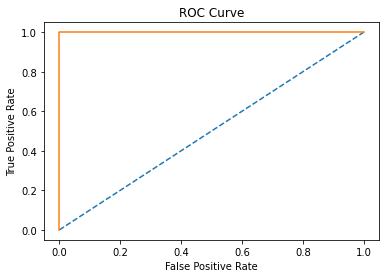

AUC score is: 1.0


In [22]:
# ROC AND AUC 
#from sklearn.metrics import roc_auc_score
#calculate fpr,tpr  from ROC_curve 
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, pred_y)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#calculate AUC score
auc_score = roc_auc_score(y_train, pred_y_prob)
print("AUC score is:", auc_score)

# (e) Binary Classification Using L1-penalized logistic regression

In [18]:
# Normalizing  features
def normalize_features(x):
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler(feature_range = (0,1))

    scaler.fit(x)
    X_train = scaler.transform(x)
    return X_train
    

In [19]:

from sklearn.model_selection import GridSearchCV

In [27]:
#from sklearn.model_selection import GridSearchCV

output_dic = {}
accuracy=[]
C_Value = []
for l in range(1,21):
    #train dataset for each l
    train_sliced = revised_extractFeature(train_data,l) ### break train data into l piece 
    
    X_train = getFeature(train_sliced)  ### three features that we choose previously 
    y_train = train_sliced.iloc[:,-1] ### target value 

    ### revise the imblanced data using smote
    # transform the dataset to avoid imblance data 
    sm = SMOTE(random_state = 2)
    X_train, y_train = sm.fit_sample(X_train, y_train)

    
    ## Normalize predicots
    X_train = normalize_features(X_train)
    
    #L1-penalized logistic regression
    
    grid={"C":np.logspace(-1, 1, 10), "penalty":["l1"]}# l1 lasso 
    logreg=LogisticRegression(solver='liblinear', max_iter=500)
    logreg_cv=GridSearchCV(logreg,grid,cv=5,n_jobs=-1)
    logreg_cv.fit(X_train,y_train)
    
    #C_Value.append(logreg_cv.best_params_["C"])
    #accuracy.append.(logreg_cv.best_score_)
    
    output_dic[l] = (logreg_cv.best_params_["C"],logreg_cv.best_score_)
    
    
    



In [29]:
for i,item in output_dic.items():
    print("the l is : {} and the C is: {} the accuracy for the model is : {}".format(i,item[0],item[1]))
    

the l is : 1 and the C is: 10.0 the accuracy for the model is : 0.9833333333333332
the l is : 2 and the C is: 3.593813663804626 the accuracy for the model is : 0.9666666666666666
the l is : 3 and the C is: 0.774263682681127 the accuracy for the model is : 0.9833333333333332
the l is : 4 and the C is: 2.1544346900318834 the accuracy for the model is : 0.9833333333333332
the l is : 5 and the C is: 2.1544346900318834 the accuracy for the model is : 0.9833333333333332
the l is : 6 and the C is: 0.774263682681127 the accuracy for the model is : 0.9833333333333334
the l is : 7 and the C is: 10.0 the accuracy for the model is : 0.9916666666666668
the l is : 8 and the C is: 1.291549665014884 the accuracy for the model is : 0.9833333333333332
the l is : 9 and the C is: 0.774263682681127 the accuracy for the model is : 0.975
the l is : 10 and the C is: 1.291549665014884 the accuracy for the model is : 0.975
the l is : 11 and the C is: 1.291549665014884 the accuracy for the model is : 0.991666666

from the result, I choose best l is 7 , and the corresponding C is 10 because it have high accuracy and with relative less predictors 

In [30]:
 #refit the model using best l and best C 
best_l = 7
train_sliced = revised_extractFeature(train_data,best_l) ### break train data into 2 piece 
    
X_train = getFeature(train_sliced)  ### three features that we choose previously 
y_train = train_sliced.iloc[:,-1] ### target value 

### revise the imblanced data using smote
# transform the dataset to avoid imblance data 
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_sample(X_train, y_train)
 
    ## Normalize predicots
X_train = normalize_features(X_train)


# Test the classiﬁer on the test set

In [48]:
### get the test point prepared break the test set into same slice with train  
test_sliced = revised_extractFeature(test_data,best_l)

X_test = getFeature(test_sliced)  ### get three features ready 
y_test= test_sliced.iloc[:,-1] ### target value 

## Normalize predicots
X_test = normalize_features(X_test) 

### test on test set 
#L1-penalized logistic regression 
best_c = 10
logreg2=LogisticRegression(C=10,penalty="l1",solver='saga', n_jobs=-1,max_iter=10000)
logreg2.fit(X_train,y_train)
print("Test score",logreg2.score(X_test,y_test))

Test score 0.8947368421052632


ii. Compare the L1-penalized with variable selection using p-values. Which one
performs better? Which one is easier to implement?

The accuracy of the best model using L1 penalized is 0.89. However, the best accuracy of the model with variable selection using p-values is 1.0. thus, I believe that the model with variable selection using p-values is better than the L1-penalized model.However, it's easier to implement the L1-penalty regression with faster speed.



# (f) Multi-class Classification (The Realistic Case)

In [20]:
### since we need to apply multi classification we need to revise the extract fearture function 
### data is the data we need to extract features , divide is how many piece we need to divide the dataset  
from sklearn.linear_model import LogisticRegressionCV
def multi_extractFeature(data, divide):
    import math
    sample_size=math.ceil(480/divide)
    
    features = divide * 6 
    flat_colnames = create_col(features)
    
    ## create a empty df  
    df = pd.DataFrame(columns = flat_colnames)

    for folder, file in data.items():

        for instance in file:
            piece_col = ['min', 'max', 'mean', '50%', 'std', '25%', '75%']
        
            ## create a empty df to store each sliced df and concatenate them
            sliced_df = pd.DataFrame(columns = piece_col)
            ## get rid of time column 
            temp_instance_df = instance.iloc[:,1:]
            start_index = 0
            for i in range(divide):
                if i == divide -1: ## last piece
                    temp_df = temp_instance_df.iloc[start_index:,] 
                else:
                    temp_df = temp_instance_df.iloc[start_index:start_index+sample_size,]
                
                info = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
         
                start_index += sample_size
         
                sliced_df = sliced_df.append(info) ### append piece of dataframe into a empty df 
            
            ### reshape the dataframe into single row 
            df_summary = pd.DataFrame(sliced_df.to_numpy().reshape(1,-1),columns = flat_colnames)
            ### classify the acitivity 
            
            if folder == "bending1" or folder == "bending2":
                df_summary["activity"] = "bending"
            else:
                df_summary["activity"] = folder
                
            df = df.append(df_summary)

    return df 
        


# f) i Find the bestl in the same way as you found it in 1(e)i  Report your test error. confusion matrices and ROC curves.

In [80]:
from sklearn.linear_model import LogisticRegressionCV

output_dic = {}
accuracy=[]
C_Value = []
for l in range(1,21):
    #train dataset for each l
    train_sliced = multi_extractFeature(train_data,l) ### break train data into l piece 
    
    X_train = getFeature(train_sliced)  ### three features that we choose previously 
    y_train = train_sliced.iloc[:,-1] ### target value 
    
    ## Normalize predicots
    X_train = normalize_features(X_train)
    
    
    #L1-penalized logistic regression for Multi-class
    logregcv_multi = LogisticRegressionCV(cv=5, penalty='l1',Cs=np.logspace(-1, 1, 10),
                                          solver='saga', 
                                          multi_class='multinomial',
                                          n_jobs=-1,
                                          max_iter=10000
                                         )
    logregcv_multi.fit(X_train, y_train)
    
    c_number = logregcv_multi.C_[0]
    C_Value.append(c_number)
    score = logregcv_multi.score(X_train,y_train)
    accuracy.append(score)
    
    output_dic[l] = (c_number,score)
    
    
    



In [84]:
for i,item in output_dic.items():
    print(" l is {}, best c is :{} and accuracy is :{}".format(i,item[0],item[1]))
    

 l is 1, best c is :5.994842503189409 and accuracy is :0.9855072463768116
 l is 2, best c is :0.774263682681127 and accuracy is :0.927536231884058
 l is 3, best c is :2.1544346900318834 and accuracy is :0.9710144927536232
 l is 4, best c is :3.593813663804626 and accuracy is :0.9855072463768116
 l is 5, best c is :5.994842503189409 and accuracy is :1.0
 l is 6, best c is :2.1544346900318834 and accuracy is :0.9855072463768116
 l is 7, best c is :2.1544346900318834 and accuracy is :0.9710144927536232
 l is 8, best c is :2.1544346900318834 and accuracy is :0.9855072463768116
 l is 9, best c is :3.593813663804626 and accuracy is :1.0
 l is 10, best c is :5.994842503189409 and accuracy is :1.0
 l is 11, best c is :3.593813663804626 and accuracy is :1.0
 l is 12, best c is :2.1544346900318834 and accuracy is :1.0
 l is 13, best c is :10.0 and accuracy is :1.0
 l is 14, best c is :3.593813663804626 and accuracy is :1.0
 l is 15, best c is :5.994842503189409 and accuracy is :1.0
 l is 16, bes

from the result,  I choose l = 5 and c = 5.994842503189409 as the best since it has accuracy of 1 and it doesn't have too many predictors 

In [21]:
### refit the model using best l and best c 

best_l = 5
train_sliced = multi_extractFeature(train_data,best_l)
### get the test point prepared break the test set into same slice with train  
test_sliced = multi_extractFeature(test_data,best_l)

X_train = getFeature(train_sliced)  ### three features that we choose previously 
y_train = train_sliced.iloc[:,-1] ### target value 
## Normalize predicots_ for train 
X_train = normalize_features(X_train)

best_c = 5.994842503189409
logregmulti_l1 = LogisticRegression(C=best_c, 
                                 penalty='l1', 
                                 solver='saga', 
                                 multi_class='multinomial',
                                 n_jobs=-1,
                                 max_iter=10000)
logregmulti_l1.fit(X_train, y_train)

LogisticRegression(C=5.994842503189409, max_iter=10000,
                   multi_class='multinomial', n_jobs=-1, penalty='l1',
                   solver='saga')

Test the classiﬁer on the test set

In [22]:

### test data 
X_test = getFeature(test_sliced)  ### get three type features ready 
y_test= test_sliced.iloc[:,-1] ### target value 

## Normalize predicots for test 
X_test = normalize_features(X_test) 

# Get the accuracy score and the corresponding test error
test_accuracy_l1 = logregmulti_l1.score(X_test, y_test)
test_error = 1 - test_accuracy_l1

print("test_accuracy for l1 logistic regreesion:",test_accuracy_l1)
print("test error for l1 logistic regression:" ,test_error)

test_accuracy for l1 logistic regreesion: 0.8421052631578947
test error for l1 logistic regression: 0.1578947368421053


In [23]:
#Get the confusion matrix for multi-class 

y_pred = logregmulti_l1.predict(X_test)
cm_L1= confusion_matrix(y_test, y_pred)


In [24]:
confusion_matrix_table = pd.DataFrame(cm_L1,index=['Actual bending', 'Actual cycling', 'Actual lying', 'Actual sitting', 'Actual standing', 'Actual walking'],
                 columns = ['Predicted bending', 'Predicted cycling', 'Predicted lying', 'Predicted sitting', 'Predicted standing', 'Predited walking'])
confusion_matrix_table

,Predicted bending,Predicted cycling,Predicted lying,Predicted sitting,Predicted standing,Predited walking
Actual bending,3,0,0,0,1,0
Actual cycling,0,3,0,0,0,0
Actual lying,0,0,3,0,0,0
Actual sitting,0,0,0,2,1,0
Actual standing,0,0,0,1,2,0
Actual walking,0,0,0,0,0,3


# Multi-class ROC 


A multiclass AUC is a mean of several AUC, which is obtained through a one-vs-rest approach through binarization of our target variable, which means that treat the multiclass as a binary classification problem that is consider one vs rest and calculate the operating points for each class and then average it out for the entire classifier

In [25]:
### get each prob for each calss 
pred_y_prob =logregmulti_l1.predict_proba(X_test)

dic_prob = {}
for i, prob in enumerate(zip(*pred_y_prob)):
    #print(i,prob)
    dic_prob[i] = prob

In [50]:
print(dic_prob)

{0: (0.9922553803255443, 0.9853611107302644, 0.918066543002437, 0.18193192258545166, 0.012804896501455552, 0.01372753886964507, 0.004581723504571711, 0.0008717067818269276, 3.2203835052316205e-05, 4.841780667021283e-07, 0.010230111301698258, 0.09928134161157842, 0.08754404935207784, 0.07994082150230286, 0.01187571467165697, 0.008068551924351606, 0.0013014317866916934, 0.0002549562579347424, 0.0006696577290354157), 1: (6.232906728486459e-05, 0.0005706770222866968, 0.0004403152673089611, 0.007489875399261642, 0.966756306665435, 0.9659131505089862, 0.9736641524426894, 0.0003408339356755578, 5.1986211537219856e-05, 6.088953325360869e-06, 0.07771894250885168, 0.01129861542118613, 0.01156642904405878, 0.011231224590542365, 0.005685386643992873, 0.002579531875176887, 0.2841228309978226, 0.035778116625014414, 0.10305839019962391), 2: (1.9684543810320497e-07, 5.125716618198648e-07, 1.8294692037538096e-05, 9.852141769881823e-05, 7.228607043650879e-05, 0.00018284726623187322, 5.150989306470547e-0

In [49]:
### convert label using one ove rest method 

y_test_bending = [ 1 if i == "bending" else 0 for i in y_test]
y_test_cycling = [ 1 if i == "cycling" else 0 for i in y_test]
y_test_lying = [ 1 if i == "lying" else 0 for i in y_test]
y_test_siting = [ 1 if i == "siting" else 0 for i in y_test]
y_test_standing = [ 1 if i == "standing" else 0 for i in y_test]
y_test_walking =[ 1 if i == "walking" else 0 for i in y_test]

In [52]:
### get false postive and true positive rate for each class 
bfpr,btpr, bthreshold =roc_curve(y_test_bending, dic_prob[0])
cfpr,ctpr, cthreshold =roc_curve(y_test_bending, dic_prob[1])
lyingfpr,lyingtpr, lyingthreshold =roc_curve(y_test_bending, dic_prob[2])
sitingfpr,sitingtpr, sitingthreshold =roc_curve(y_test_bending, dic_prob[3])
standfpr,standtpr, standthreshold =roc_curve(y_test_bending, dic_prob[4])
wfpr, wtpr, wthreshold =roc_curve(y_test_bending, dic_prob[5])


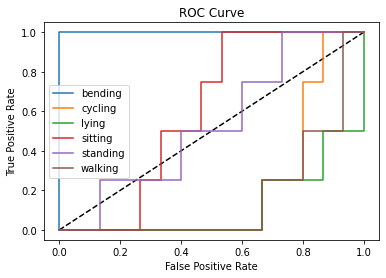

In [55]:
#plot of ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(bfpr, btpr, label="bending")
plt.plot(cfpr, ctpr,label="cycling")
plt.plot(lyingfpr, lyingtpr,label="lying")
plt.plot(sitingfpr, sitingtpr,label="sitting")
plt.plot(standfpr, standtpr,label="standing")
plt.plot(wfpr, wtpr,label="walking")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# f) ii Repeat (f)i using a Na ̈ıve Bayes’ classifier.

In [28]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score


In [37]:
### find best l and their corresponding score and accuracy using Naive Bayes 
GNB_score=[]
accuracy=[]
output_dic = {}
for l in range(1,21):
    #train dataset for each l
    train_sliced = multi_extractFeature(train_data,l) ### break train data into l piece 
    
    X_train = getFeature(train_sliced)  ### three features that we choose previously 
    y_train = train_sliced.iloc[:,-1] ### target value 
    
    ## Normalize predicots
    X_train = normalize_features(X_train)
    
    
    #Naive Bayes  for Multi-class 
    GNB = GaussianNB()
    score = cross_val_score(GNB, X_train, y_train, cv=5, n_jobs=-1) ### cv = 5 find mean score 
    mean_score = sum(score)/len(score) ### get the mean score acorss the five fold 
    GNB_score.append(mean_score)
    GNB = GNB.fit(X_train, y_train)
    accur = GNB.score(X_train,y_train)
    accuracy.append(accur)
    
    output_dic[l] = (mean_score,accur)
    
    

    
    
   

In [55]:
for i,item in output_dic.items():
    print(" l is {}, best mean_score using 5 fold is :{}".format(i,item[0]),item[1])

 l is 1, best mean_score using 5 fold is :0.8263736263736263 0.9710144927536232
 l is 2, best mean_score using 5 fold is :0.856043956043956 0.9855072463768116
 l is 3, best mean_score using 5 fold is :0.8263736263736263 0.9855072463768116
 l is 4, best mean_score using 5 fold is :0.8846153846153847 0.9855072463768116
 l is 5, best mean_score using 5 fold is :0.8417582417582418 0.9855072463768116
 l is 6, best mean_score using 5 fold is :0.8406593406593407 0.9855072463768116
 l is 7, best mean_score using 5 fold is :0.8263736263736263 0.9855072463768116
 l is 8, best mean_score using 5 fold is :0.8417582417582418 0.9855072463768116
 l is 9, best mean_score using 5 fold is :0.8120879120879121 0.9855072463768116
 l is 10, best mean_score using 5 fold is :0.7692307692307693 0.9710144927536232
 l is 11, best mean_score using 5 fold is :0.8131868131868132 0.9855072463768116
 l is 12, best mean_score using 5 fold is :0.8274725274725275 0.9855072463768116
 l is 13, best mean_score using 5 fold

from the result,I decide that l= 1 is the best l as it has highest score

In [108]:
### refit the model using best l 

best_l = 1
train_sliced = multi_extractFeature(train_data,best_l)
### get the test point prepared break the test set into same slice with train  
test_sliced = multi_extractFeature(test_data,best_l)

X_train = getFeature(train_sliced)  ### three features that we choose previously 
y_train = train_sliced.iloc[:,-1] ### target value 
## Normalize predicots_ for train 
X_train = normalize_features(X_train)

### test data 
X_test = getFeature(test_sliced)  ### get three features ready 
y_test= test_sliced.iloc[:,-1] ### target value 

## Normalize predicots for test 
X_test = normalize_features(X_test) 

## Naive Bayes classify 
gnb = GaussianNB()
gnb.fit(X_train, y_train)

test_accuracy_gnb = gnb.score(X_test, y_test)

In [109]:
print("the test accuracy for naive bayes :", test_accuracy_gnb)

the test accuracy for naive bayes : 0.7368421052631579


In [52]:
# Multinomial Naive Bayes
from sklearn.model_selection import GridSearchCV

best_score = []
best_param = []
for l in range(1, 21):
    #train dataset for each l
    train_sliced = multi_extractFeature(train_data,l) ### break train data into l piece 
    
    X_train = getFeature(train_sliced)  ### three features that we choose previously 
    y_train = train_sliced.iloc[:,-1] ### target value 
    
    ## Normalize predicots
    X_train = normalize_features(X_train)
    
    mnb = MultinomialNB()
    params = {'alpha': np.logspace(-3, 3, 20)}
    mnb_cv = GridSearchCV(estimator=mnb,
                          param_grid=params,
                          cv=5, n_jobs=-1,) # get 5-fold cv
    mnb_cv.fit(X_train, y_train)
    best_score.append(mnb_cv.best_score_)
    best_param.append(mnb_cv.best_params_)

In [83]:
l_range = [*range(1,21)]


best_params_l = [ i["alpha"] for i in best_param]

output = zip(l,best_score,best_params_l)

In [88]:

for item in output:
    print(" l is:{}, scoreis:{} and best alpha is :{}".format(item[0],item[1],item[2]))

 l is:1, scoreis:0.7538461538461538 and best alpha is :0.001
 l is:2, scoreis:0.7813186813186814 and best alpha is :0.001
 l is:3, scoreis:0.7835164835164836 and best alpha is :0.001
 l is:4, scoreis:0.7527472527472527 and best alpha is :0.001
 l is:5, scoreis:0.7824175824175824 and best alpha is :0.3359818286283781
 l is:6, scoreis:0.8120879120879121 and best alpha is :0.3359818286283781
 l is:7, scoreis:0.7835164835164835 and best alpha is :0.001
 l is:8, scoreis:0.7538461538461538 and best alpha is :0.001
 l is:9, scoreis:0.7406593406593407 and best alpha is :0.001
 l is:10, scoreis:0.7692307692307693 and best alpha is :0.3359818286283781
 l is:11, scoreis:0.7263736263736263 and best alpha is :0.001
 l is:12, scoreis:0.7549450549450549 and best alpha is :0.3359818286283781
 l is:13, scoreis:0.7252747252747253 and best alpha is :0.07847599703514611
 l is:14, scoreis:0.7252747252747251 and best alpha is :0.6951927961775606
 l is:15, scoreis:0.7395604395604396 and best alpha is :0.0784

from the result, I decide that best l is 6 and alpha = 0.3359818286283781

In [112]:
### refit the multinomial model using best l 

best_l = 6
train_sliced = multi_extractFeature(train_data,best_l)
### get the test point prepared break the test set into same slice with train  
test_sliced = multi_extractFeature(test_data,best_l)

X_train = getFeature(train_sliced)  ### three features that we choose previously 
y_train = train_sliced.iloc[:,-1] ### target value 
## Normalize predicots_ for train 
X_train = normalize_features(X_train)

### test data 
X_test = getFeature(test_sliced)  ### get three features ready 
y_test= test_sliced.iloc[:,-1] ### target value 

## Normalize predicots for test 
X_test = normalize_features(X_test) 

## test Multinomial classify 
best_alpha = 0.3359818286283781
mnb = MultinomialNB(alpha=best_alpha)
mnb.fit(X_train, y_train)
test_accuracy_mnb = mnb.score(X_test, y_test)

In [113]:
print("test_accuracy for Multinomial is :", test_accuracy_mnb)

test_accuracy for Multinomial is : 0.7894736842105263


# f )iii which method is better for multi-class classification in this problem?

In [114]:
compare_table = pd.DataFrame({ "Logistic Regression(l1):": round(test_accuracy_l1,3), \
                             "Naive Bayes": round(test_accuracy_gnb,3),
                             "Multinomial": round(test_accuracy_mnb,3)}, index =["test_accuracy"])

In [115]:
compare_table

,Logistic Regression(l1):,Naive Bayes,Multinomial
test_accuracy,0.842,0.737,0.789


From the test accuracy perspective, logistic regression has highest test accuracy is the winner. 
however, From the computation perspective, the Multinomial approach is better

# 2. ISLR 3.7.4

a) it's hard to tell for training data, because cubic regression tend to fit to noise as its increased felxibility . however, as the true relationship between X and Y is linear, we may expect the linear regression to be close to the true regression line, and consequently the RSS for the linear regression may be lower thanfor the cubic regression.


b) for test data, I would expect the linear regreession RRS would be smaller than Cubic regression. because, cubic is a more complex model, which lead to overfitting on our training data. thus, it would get higher test RSS. 


c) If the true relationship between X and Y was not linear, I would expect the cubic regression to better fit the training data due to its increased flexibility. because the more flexible model would be better fit to the training data. so cubic has lower training RSS.

d) it's hard to expect which one has lower test RSS since it denpends on the true relationship between X and Y. 
If the true relationship is far from linear, cubic regression will lead to lower RSS in test data. On the other hand, if the reationship between X and Y is very close to linear, linear regression will have lower RSS in the test data.





# 3. ISLR, 4.7.3

# 4. ISLR 4.7.7

In [ ]:
### I write the answer for above two question in Question.pdf file 

In [4]:
from IPython.display import IFrame
IFrame("Question.pdf", width=800, height=500)